In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits=load_digits()

In [3]:
print("Image data shape", digits.data.shape)
print('Label data shape', digits.target.shape)

Image data shape (1797, 64)
Label data shape (1797,)


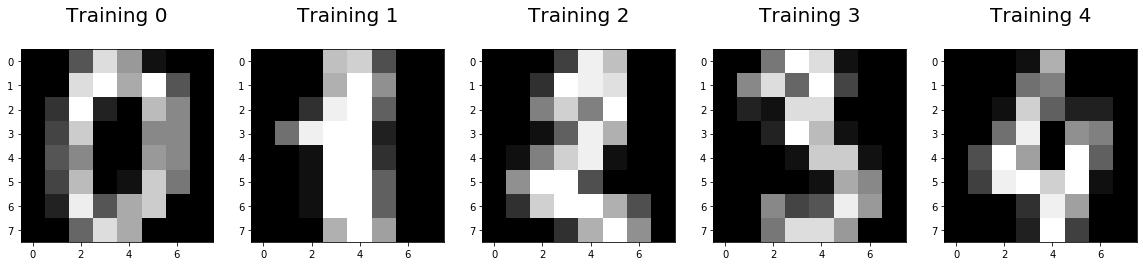

In [6]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
    plt.title('Training %i\n' % label, fontsize=20)

In [7]:
X_train, X_test, y_train, y_test=train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [8]:
print(X_train.shape)
print(y_train.shape)

(1383, 64)
(1383,)


In [9]:
print(X_test.shape)
print(y_test.shape)

(414, 64)
(414,)


In [11]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [12]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
print(model.predict(X_test[0].reshape(1,-1)))

[4]


In [14]:
model.predict(X_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [15]:
predictions=model.predict(X_test)

In [17]:
score=model.score(X_test,y_test)
print(score)

0.9420289855072463


In [18]:
cn=metrics.confusion_matrix(y_test, predictions)
print(cn)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  1  0  0  0  0  2  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  3  2  0]
 [ 0  2  0  0 34  0  0  0  1  1]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  2  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  1  3 28]]


Text(0.5, 1, 'Accuracy score: 0.9420289855072463')

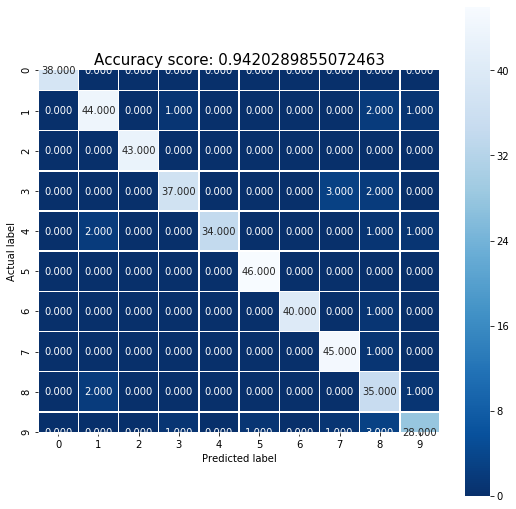

In [19]:
plt.figure(figsize=(9,9))
sns.heatmap(cn, annot=True,fmt=".3f", linewidth=.5, square=True, cmap='Blues_r' );
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title='Accuracy score: {0}'.format(score)
plt.title(all_sample_title, size=15)

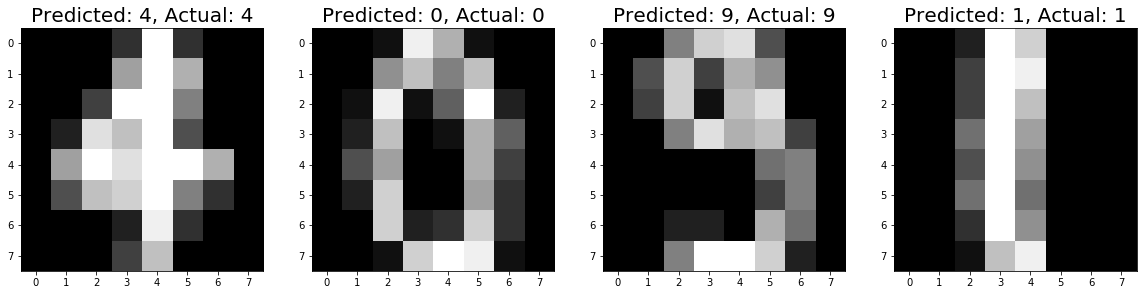

In [23]:
index=0
misclassifiedIndex=[]
for predict, actual in zip(predictions, y_test):
    if predict==actual:
        misclassifiedIndex.append(index)
    index +=1
plt.figure(figsize=(20,5))
for plotIndex, wrong in enumerate(misclassifiedIndex[0:4]):
    plt.subplot(1,4, plotIndex +1)
    plt.imshow(np.reshape(X_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}" .format(predictions[wrong], y_test[wrong]), fontsize=20)